---
title: "TZ Gaming: Optimal Targeting of Mobile Ads"
description: "Logistic Regression, Permutation Importance, Prediction Plots, Pseudo R-Squared, Chi-Square Test, Correlation, Decile Analysis, Gain Curves, Confusion Matrix"
author: "Mario Nonog"
date: today
callout-appearance: minimal # this hides the blue "i" icon on .callout-notes
theme: cosmo
image: "other_docs/HW_PHOTO.jpg"
---

### Problem Description:
As a developer of games for mobile devices, TZ gaming has achieved strong growth of its customer base. A
prominent source of new customers has come from ads displayed through the Vneta ad-network. A mobile-ad
network is a technology platform that serves as a broker between (1) app developers (or publishers) looking
to sell ad space and (2) a group of advertisers.

App developers sell “impressions”, i.e., a space where an ad can be shown, through the Vneta network to
companies such as TZ gaming looking to advertise to app users. Vneta acts as a broker for 50-60 millions
impressions/ads per day.
TZ gaming uses ads to appeal to prospective customers for their games. They generally use short (15
sec) video ads that help to emphasize the dynamic nature of the games. In the past, TZ has been able
to, approximately, break-even on ad-spend with Vneta when calculating the benefits that can be directly
attributed to ad click-through. Many senior executives at TZ believe that there are additional, longer-term,
benefits from these ads such as brand awareness, etc. that are harder to quantify.

Currently, TZ has access to very limited data from Vneta. Matt Huateng, the CEO of TZ gaming, is
intrigued by the potential for data science to enhance the efficiency of targeted advertising on mobile devices.
Specifically, two options are under consideration: (1) Buy access to additional data from Vneta and use TZ’s
analytics team to build targeting models or (2) Subscribe to Vneta’s analytics consultancy service, which
provides impression-level click-through rate predictions based on Vneta’s proprietary data and algorithms.

Vneta has shared behavioral information linked to 115,488 recent impressions used to show TZ ads and has
also provided a set or predictions based on their own (proprietary) algorithm. Matt is unsure if the consulting
services offered by Vneta will be worth the money for future ad campaigns and has asked you to do some
initial analyses on the provided data and compare the generated predictions to Vneta’s recommendations.
The following targeting options will be evaluated to determine the best path forward.

### Options:
1. Spam all prospects
2. Continue with the current targeting approach
3. Use predictions from a logistic regression model for ad targeting
4. Use predictions generated by Vneta for ad targeting


### Assumptions
The assumptions used for the analysis are as follows:
• Targeting of impressions to consumers covered by the Vneta ad-network to date has been (approximately) random
• Cost per 1,000 video impressions (CPM) is $10
• Conversion to sign-up as a TZ game player after clicking on an ad is 5%
• The expected CLV of customers that sign-up with TZ after clicking on an ad is approximately $25
• The price charged for the data by Vneta is $50K
• The price charged for the data science consulting services by Vneta is $150K

### Approach:
• Use the 87,535 rows in the data with “training == ‘train’ ” to estimate different models. Then generate
predictions for all 115,488 rows in the dataset
• Options 1-4 should be evaluated only on the predictions generated for the 27,953 rows in the data with
“training == ‘test’ ”. These are the observations that were not used to estimate your model
• Extrapolate the cost and benefits for options 1-4 above for an upcoming advertising campaign where
TZ will commit to purchase 20-million impressions from Vneta

TZ gaming has decided to use logistic regression for targeting. This is a powerful and widely used tool to
model consumer response. It is similar to linear regression but the key difference is that the response variable
(target) is binary (e.g., click or no-click) rather than continuous. For each impression, the logistic regression
model will predict the probability of click-through, which can be used for ad targeting. Like linear regression,
you can include both continuous and categorical predictors in your model as explanatory variables (features).
Matt is eager to assess the value of logistic regression as a method to predict ad click-through and target
prospects and has asked you to complete the following analyses.

### TZ Gaming: Optimal Targeting of Mobile Ads

Each row in the `tz_gaming` dataset represents an impression. For each row (impression), we have data on 21 variables. All explanatory variables are created by Vneta based on one month tracking history of users, apps, and ads. The available variables are described in below. 

* _training_ -- Dummy variable that splits the dataset into a training ("train") and a test ("test") set
* _inum_ -- Impression number
* _click_ -- Click indicator for the TZ ad served in the impression. Equals "yes" if the ad was clicked and "no" otherwise
* _time_ -- The hour of the day in which the impression occurred (1-24). For example, "2" indicates the impression occurred between 1 am and 2 am
* _time\_fct_ -- Same as _time_ but the is coded as categorical 
* _app_ -- The app in which the impression was shown. Ranges from 1 to 49
* _mobile\_os_ -- Customer's mobile OS
* _impup_ -- Number of past impressions the user has seen in the app
* _clup_ -- Number of past impressions the user has clicked on in the app
* _ctrup_ -- Past CTR (Click-Through Rate) (x 100) for the user in the app
* _impua_ -- Number of past impressions of the TZ ad that the user has seen across all apps
* _clua_ -- Number of past impressions of the TZ ad that the user has clicked on across all apps
* _ctrua_ -- Past CTR (x 100) of the TZ ad by the user across all apps
* _imput_ -- Number of past impressions the user has seen within in the hour
* _clut_ -- Number of past impressions the user has clicked on in the hour
* _ctrut_ -- Past CTR (x 100) of the user in the hour
* _imppat_ -- Number of past impressions that showed the TZ ad in the app in the hour
* _clpat_ -- Number of past clicks the TZ ad has received in the app in the hour
* _ctrpat_ -- Past CTR (x 100) of the TZ ad in the app in the hour
* _rnd_ -- Simulated data from a normal distribution with mean 0 and a standard deviation of 1
* _pred\_vneta_ -- Predicted probability of click per impressions generated by Vneta's proprietary machine learning algorithm
* id -- Anonymized user ID

Note that there is a clear relationship between the impressions, clicks, and ctr variables within a strata. Specifically: 

* ctrup = clup/impup
* ctru = clu/impu
* ctrut = clut/imput
* ctrpat = clpat/impat

The last three letters of a feature indicate the sources of variation in a variable:

* u — denotes user
* t — denotes time
* p — denotes app
* a — denotes ad 

### Logistic Regression
:::: {.callout-note collapse="true"}

In [1]:
import pandas as pd
tz_gaming = pd.read_parquet("data/tz_gaming.parquet")
print(tz_gaming)

       training     inum click  time time_fct    app mobile_os  impup  clup  \
0         train       I7    no     9        9   app8       ios    439     2   
1         train      I23    no    15       15   app1       ios     64     0   
2         train      I28    no    12       12   app5       ios     80     0   
3         train      I30    no    19       19   app1       ios     25     0   
4         train      I35    no    24       24   app1   android   3834    29   
...         ...      ...   ...   ...      ...    ...       ...    ...   ...   
115483     test  I399982    no    21       21   app2       ios   2110     0   
115484     test  I399986    no    17       17  app14   android    291     1   
115485     test  I399991    no    23       23   app1   android    364     3   
115486     test  I399992    no    20       20   app6   android     59     2   
115487     test  I399994    no    18       18   app1       ios    498     7   

           ctrup  ...     ctrua  imput  clut     ct

In [2]:
tz_train = tz_gaming[tz_gaming["training"] == "train"]
print(tz_train["training"].head())

tz_train

0    train
1    train
2    train
3    train
4    train
Name: training, dtype: object


,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,ctrua,imput,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,0.000000,25,0,0.000000,71,1,1.408451,-1.207066,0.003961,id247135
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,0.000000,7,0,0.000000,67312,1069,1.588127,0.277429,0.003961,id245079
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,6.578947,94,0,0.000000,331,1,0.302115,1.084441,0.003961,id927245
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,0.000000,19,0,0.000000,71114,1001,1.407599,-2.345698,0.018965,id922188
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,0.689655,329,4,1.215805,183852,2317,1.260253,0.429125,0.003961,id355833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87530,train,I299985,no,11,11,app2,android,1181,0,0.000000,...,0.840336,55,0,0.000000,9625,14,0.145455,-0.249031,0.003961,id565693
87531,train,I299986,no,10,10,app33,ios,1885,0,0.000000,...,0.000000,374,0,0.000000,658,1,0.151976,0.770718,0.003961,id222657
87532,train,I299990,no,1,1,app45,ios,8,0,0.000000,...,0.000000,15,0,0.000000,166,7,4.216867,0.181559,0.018965,id340594
87533,train,I299991,no,8,8,app1,ios,113,2,1.769912,...,0.000000,0,0,0.000000,14245,158,1.109161,-1.263831,0.003961,id634151


::::

In [3]:
import pyrsm as rsm
clf= rsm.model.logistic(
        data={"tz_train":tz_train},
        rvar= "click",
        lev="yes",
        evar=[ "time_fct", "app", "mobile_os", "impua", "clua", "ctrua"]
)
clf.summary()

Logistic regression (GLM)
Data                 : tz_train
Response variable    : click
Level                : yes
Explanatory variables: time_fct, app, mobile_os, impua, clua, ctrua
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

                     OR      OR%  coefficient   std.error  z.value p.value     
Intercept         0.029   -97.1%       -3.528       0.197  -17.936  < .001  ***
time_fct[2]       0.622   -37.8%       -0.474       0.321   -1.478   0.139     
time_fct[3]       0.718   -28.2%       -0.332       0.454   -0.730   0.466     
time_fct[4]       0.000  -100.0%      -23.543   42007.161   -0.001     1.0     
time_fct[5]       0.000  -100.0%      -23.721   55229.970   -0.000     1.0     
time_fct[6]       0.349   -65.1%       -1.052       1.021   -1.030   0.303     
time_fct[7]       1.221    22.1%        0.200       0.426    0.468    0.64     
time_fct[8]       1.104    10.4%        0.099       0.296    0.335   0.737     
time_fct[

### Interpretation
For OR (Odds Ratio) As another hour is added to tim_fct[2], the model suggest that the odds of clicking will decrease by a factor of 0.622 or by 37.8% that is when keeping all other variable in the model constant. 

For OR (Odds Ratio) As another hour is added to tim_fct[3], the model suggest that the odds of clicking will decrease by a factor of 0.718 or by 28.2% that is when keeping all other variable in the model constant. 

And so on for all the rest of the features. 

### Chi-Square Citical Value

In [4]:
from scipy.stats import chi2
df=76
alpha_0_05 = chi2.ppf(1-0.05,df)
alpha_0_01= chi2.ppf(1-0.01,df)
print(alpha_0_05,alpha_0_01)

97.35097037903296 107.58254478061235


The logistic regression chi square value (970) is so much higher than both the calculated chi-square critical value above(97, 107). Therefore, the difference between the observed data and expected data is extremely large, thus reject the null hypothesis. 

:::: {.callout-note collapse="true"}
### Model Fit Metrics

| Metric             | Value |Meaning                                                         |
|----------------------|---------------------------------------------------------------------|
| McFadden Pseudo R²   | 0.109,  Indicates modest model fit (0.2–0.4 is strong)                                                          |
| Adjusted Pseudo R²   |  0.092, Slightly adjusted down for number of predictors                                                                 
| AUC             | 0.792, 	Good discrimination power (0.7–0.8 = good)                                                    |
| Log-likelihood           | -3946.072  higher is better                                                  
| AIC              | 8046.145, Lower = better fit                                                   |
| BIC        | 8768.389, Penalizes complexity more than AIC                                        |
| Chi-squared (df=76)           | 968.279, Strong model signal (p < 0.001)                                        |
| Number of Observations         |87,535,Large dataset, good statistical power 
::::

Based on the p=value the most significant features are app2. app13, app14, mobile_os, impua,clua and ctrua. Now let use a different method to see the variable that is the  most important. However, first let us see the plot of the classifier (clf)

### Plot

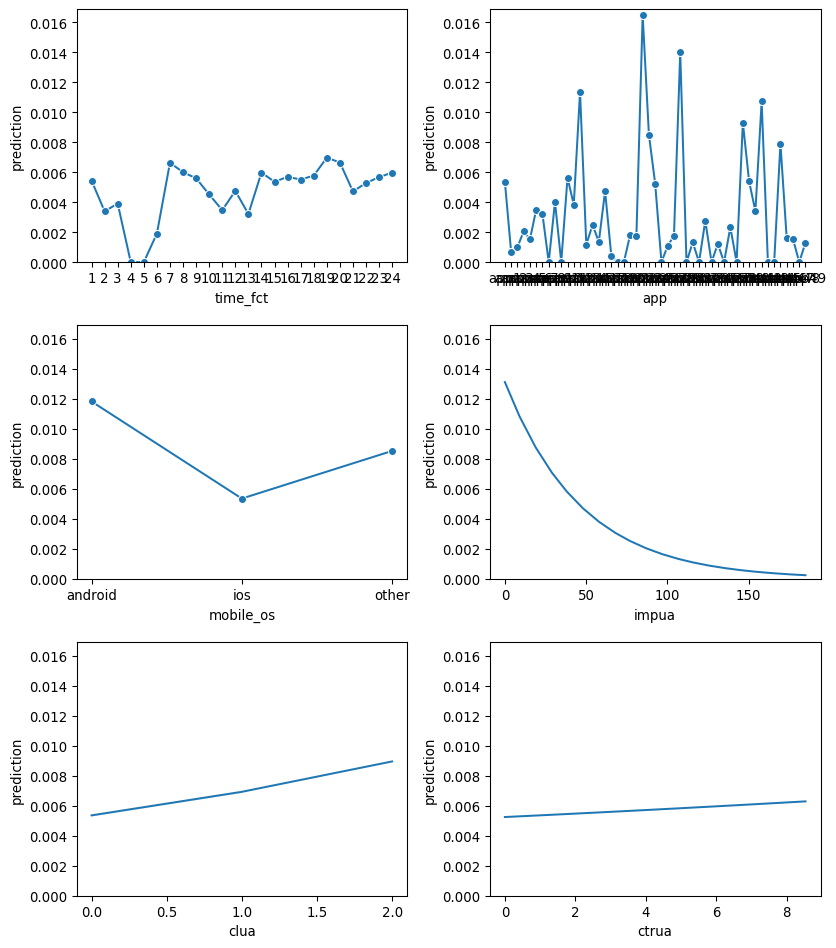

In [5]:
clf.plot(
    plots="pred", incl=[ "time_fct", "app", "mobile_os", "impua", "clua", "ctrua"]
)

### Permutation Importance

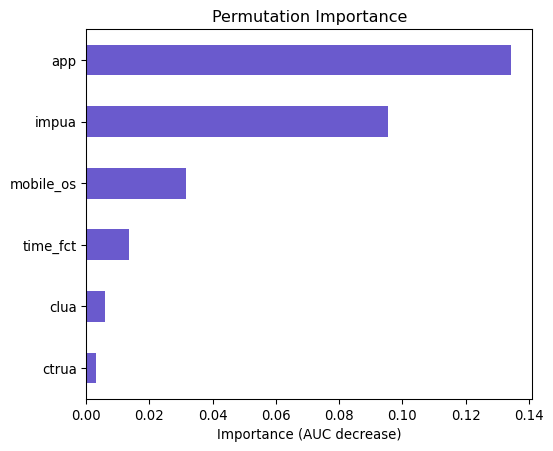

In [6]:
clf.plot("vimp")

### Interpretation

The app variable has the highest importance because it has the highest decrease in AUC after permutted. Impua comes second which still contributes significantly on model predictions. Then, mobile_os is next important and the last three is time_fct, clua, ctrua have way less impact on model predictions. The chi square of 968 is way above our critical value of 97 and 107, which means that there is a greater deviation between observed and expected frequencies, suggesting that more variables are more likely to be dependent or assoicated from each other, which is also supported by  the p_value less than 0.001. The Pseudo R-Squared of 0.109 or 0.092 when adjusted indicates the goodness of fit for logistic regression, higher means better fit. This number shows on how well the independent variales explain the dependent variables. 



### Prediction of Click Probability

In [7]:
tz_gaming["pred_logit"]= clf.predict(tz_gaming)["prediction"]
print(tz_gaming.head())

  training inum click  time time_fct   app mobile_os  impup  clup     ctrup  \
0    train   I7    no     9        9  app8       ios    439     2  0.455581   
1    train  I23    no    15       15  app1       ios     64     0  0.000000   
2    train  I28    no    12       12  app5       ios     80     0  0.000000   
3    train  I30    no    19       19  app1       ios     25     0  0.000000   
4    train  I35    no    24       24  app1   android   3834    29  0.756390   

   ...  imput  clut     ctrut  imppat  clpat    ctrpat       rnd  pred_vneta  \
0  ...     25     0  0.000000      71      1  1.408451 -1.207066    0.003961   
1  ...      7     0  0.000000   67312   1069  1.588127  0.277429    0.003961   
2  ...     94     0  0.000000     331      1  0.302115  1.084441    0.003961   
3  ...     19     0  0.000000   71114   1001  1.407599 -2.345698    0.018965   
4  ...    329     4  1.215805  183852   2317  1.260253  0.429125    0.003961   

         id    pred_logit  
0  id247135  3.3

In [8]:
tz_train["pred_logit"]= clf.predict(tz_train)["prediction"]
print(tz_train.head())

  training inum click  time time_fct   app mobile_os  impup  clup     ctrup  \
0    train   I7    no     9        9  app8       ios    439     2  0.455581   
1    train  I23    no    15       15  app1       ios     64     0  0.000000   
2    train  I28    no    12       12  app5       ios     80     0  0.000000   
3    train  I30    no    19       19  app1       ios     25     0  0.000000   
4    train  I35    no    24       24  app1   android   3834    29  0.756390   

   ...  imput  clut     ctrut  imppat  clpat    ctrpat       rnd  pred_vneta  \
0  ...     25     0  0.000000      71      1  1.408451 -1.207066    0.003961   
1  ...      7     0  0.000000   67312   1069  1.588127  0.277429    0.003961   
2  ...     94     0  0.000000     331      1  0.302115  1.084441    0.003961   
3  ...     19     0  0.000000   71114   1001  1.407599 -2.345698    0.018965   
4  ...    329     4  1.215805  183852   2317  1.260253  0.429125    0.003961   

         id    pred_logit  
0  id247135  3.3

/tmp/ipykernel_58081/4094291988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tz_train["pred_logit"]= clf.predict(tz_train)["prediction"]


### Logistic Regression (EVAR: ONLY RND)

In [9]:
clf_rnd= rsm.model.logistic(
    data= {"tz_train": tz_train},
    rvar= "click",
    lev= "yes",
    evar= "rnd"
)
clf_rnd.summary()

Logistic regression (GLM)
Data                 : tz_train
Response variable    : click
Level                : yes
Explanatory variables: rnd
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.009  -99.1%       -4.720      0.036 -130.657  < .001  ***
rnd        0.965   -3.5%       -0.036      0.036   -0.986   0.324     

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.0
Pseudo R-squared (McFadden adjusted): -0.0
Area under the RO Curve (AUC): 0.513
Log-likelihood: -4429.726, AIC: 8863.451, BIC: 8882.211
Chi-squared: 0.972, df(1), p.value 0.324 
Nr obs: 87,535


### Prediction of Click Probability (EVAR: ONLY RND)

In [10]:
tz_gaming["pred_rnd"]= clf_rnd.predict(tz_gaming)["prediction"]
print(tz_gaming.head())

  training inum click  time time_fct   app mobile_os  impup  clup     ctrup  \
0    train   I7    no     9        9  app8       ios    439     2  0.455581   
1    train  I23    no    15       15  app1       ios     64     0  0.000000   
2    train  I28    no    12       12  app5       ios     80     0  0.000000   
3    train  I30    no    19       19  app1       ios     25     0  0.000000   
4    train  I35    no    24       24  app1   android   3834    29  0.756390   

   ...  clut     ctrut  imppat  clpat    ctrpat       rnd  pred_vneta  \
0  ...     0  0.000000      71      1  1.408451 -1.207066    0.003961   
1  ...     0  0.000000   67312   1069  1.588127  0.277429    0.003961   
2  ...     0  0.000000     331      1  0.302115  1.084441    0.003961   
3  ...     0  0.000000   71114   1001  1.407599 -2.345698    0.018965   
4  ...     4  1.215805  183852   2317  1.260253  0.429125    0.003961   

         id    pred_logit  pred_rnd  
0  id247135  3.382977e-13  0.009222  
1  id24507

In [11]:
tz_train["pred_rnd"]= clf_rnd.predict(tz_train)["prediction"]
print(tz_train.head())

  training inum click  time time_fct   app mobile_os  impup  clup     ctrup  \
0    train   I7    no     9        9  app8       ios    439     2  0.455581   
1    train  I23    no    15       15  app1       ios     64     0  0.000000   
2    train  I28    no    12       12  app5       ios     80     0  0.000000   
3    train  I30    no    19       19  app1       ios     25     0  0.000000   
4    train  I35    no    24       24  app1   android   3834    29  0.756390   

   ...  clut     ctrut  imppat  clpat    ctrpat       rnd  pred_vneta  \
0  ...     0  0.000000      71      1  1.408451 -1.207066    0.003961   
1  ...     0  0.000000   67312   1069  1.588127  0.277429    0.003961   
2  ...     0  0.000000     331      1  0.302115  1.084441    0.003961   
3  ...     0  0.000000   71114   1001  1.407599 -2.345698    0.018965   
4  ...     4  1.215805  183852   2317  1.260253  0.429125    0.003961   

         id    pred_logit  pred_rnd  
0  id247135  3.382977e-13  0.009222  
1  id24507

/tmp/ipykernel_58081/2027560838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tz_train["pred_rnd"]= clf_rnd.predict(tz_train)["prediction"]


## Multicollinearity and Omitted Variable Bias

In [12]:
clf_mc1 = rsm.model.logistic(
    data= {"tz_train":tz_train},
    rvar= "click",
    lev= "yes",
    evar= ["imppat", "clpat", "ctrpat"]
)
clf_mc1.summary()

Logistic regression (GLM)
Data                 : tz_train
Response variable    : click
Level                : yes
Explanatory variables: imppat, clpat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.004  -99.6%       -5.419      0.073  -74.156  < .001  ***
imppat     1.000   -0.0%       -0.000      0.000   -4.802  < .001  ***
clpat      1.002    0.2%        0.002      0.000    5.713  < .001  ***
ctrpat     1.615   61.5%        0.479      0.034   13.933  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.035
Pseudo R-squared (McFadden adjusted): 0.035
Area under the RO Curve (AUC): 0.676
Log-likelihood: -4273.088, AIC: 8554.176, BIC: 8591.695
Chi-squared: 314.248, df(3), p.value < 0.001 
Nr obs: 87,535


### Chi-Square Citical Value

In [13]:
from scipy.stats import chi2
df=3
alpha_0_05 = chi2.ppf(1-0.05,df)
alpha_0_01= chi2.ppf(1-0.01,df)
print(alpha_0_05,alpha_0_01)

7.8147279032511765 11.34486673014437


### Plot

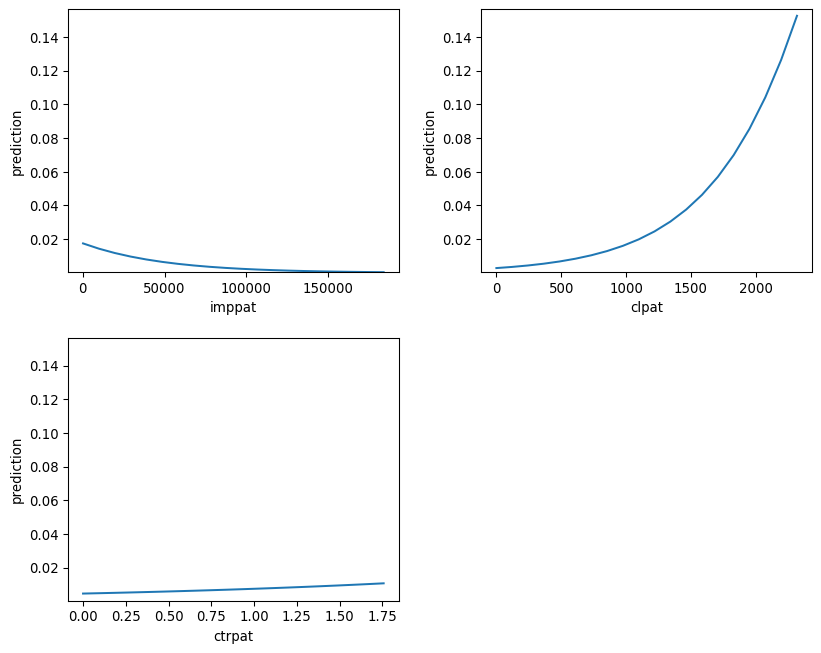

In [14]:
clf_mc1.plot(
    plots="pred", incl=["imppat", "clpat", "ctrpat"]
)

### Permutation Importance

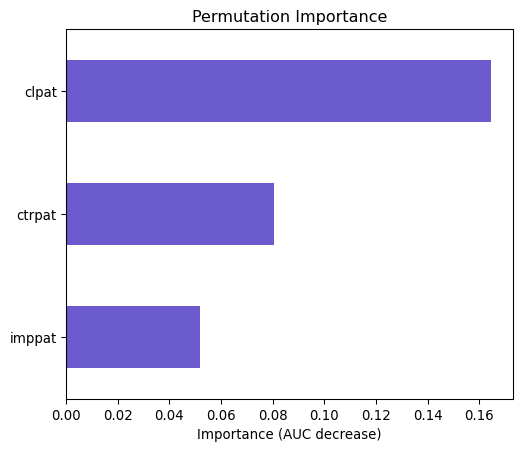

In [15]:
clf_mc1.plot(plots="vimp")

### Interpretation

For Odd Ratio, when you increase the ctrpat (click throgh put rate) by one unit, the odds of the outcome which is clicking increases by a factor of 1.615 or 61.5% while other variables remain constant.Meanwhile, a unit increase only by a factor of 1.002 for clpt (past clicks in a specific hour) and no effect on odd of clicking for the feature imppat (the number of past impression that showed a TZ ad)

Using the coefficient and the plot, an increase in the number of past impression that showed a TZ ad(immpat) has a insignificant negative correlation(-0.00) with odds of clicking. This shows in both regression and plot. Then, there is a slight positive coeffecient(0.00) between clpat and the odds of clicking. Finally, we have considerable positive correlation(0.48) between ctrpat and the odds of clicking. Both of these shows in the plot as well. 

 all p_values are less than 0.05 implies on the significant effect of imppat, ctrpat and clpat on the odds of clicking. In fact, they all have three asterisk which amplifies the level of statistical significance of these three variables.

#### Correlation

In [16]:
tz_train[['imppat', 'clpat', 'ctrpat']].corr()

,imppat,clpat,ctrpat
imppat,1.000000,0.971579,0.344099
clpat,0.971579,1.000000,0.460035
ctrpat,0.344099,0.460035,1.000000


In [17]:
clf_mc2 = rsm.model.logistic(
    data= {"tz_train": tz_train},
    rvar = "click",
    lev= "yes",
    evar =["imppat", "ctrpat"],
 )
clf_mc2.summary()

Logistic regression (GLM)
Data                 : tz_train
Response variable    : click
Level                : yes
Explanatory variables: imppat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.004  -99.6%       -5.529      0.068  -80.814  < .001  ***
imppat     1.000    0.0%        0.000      0.000    5.460  < .001  ***
ctrpat     1.733   73.3%        0.550      0.030   18.422  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.031
Pseudo R-squared (McFadden adjusted): 0.031
Area under the RO Curve (AUC): 0.674
Log-likelihood: -4290.903, AIC: 8587.805, BIC: 8615.945
Chi-squared: 278.619, df(2), p.value < 0.001 
Nr obs: 87,535


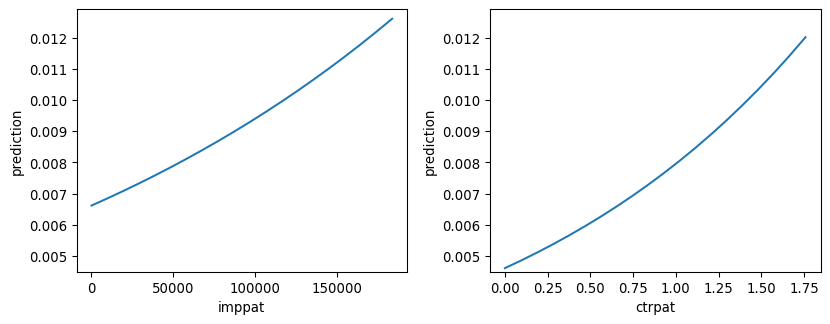

In [18]:
clf_mc2.plot("pred")

#### Interpretation

The coefficient of ctrpat increased from 0.48 to 0.55, and the odds ratio rose from 61.5% to 73.3%. This suggests that removing clpat revealed the true impact of the remaining explanatory variables. While Pseudo R-Squared and AUC were not significantly affected, the predicted plot now shows a clearer relationship between the odds of clicking and the variables imppat and ctrpat. Since imppat and clpat have a high correlation of 0.97, multicollinearity exists, which can make coefficient estimates unstable and affect model interpretation. By omitting one of these highly correlated variables, we mitigate this issue, leading to a more interpretable model. This is evident in the plot, where the relationship between ctrpat, imppat, and the odds of clicking is now more clearly observed.

#### Difference After Adding More Features

In [19]:
clf_mc3 = rsm.model.logistic (
    data = {"tz_train": tz_train},
    rvar= "click",
    lev= "yes",
    evar=["time_fct", "app", "imppat", "clpat", "ctrpat"]
)

clf_mc3.summary()

Logistic regression (GLM)
Data                 : tz_train
Response variable    : click
Level                : yes
Explanatory variables: time_fct, app, imppat, clpat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

                 OR      OR%  coefficient   std.error  z.value p.value     
Intercept     0.012   -98.8%       -4.424       0.284  -15.575  < .001  ***
time_fct[2]   0.588   -41.2%       -0.532       0.323   -1.644     0.1     
time_fct[3]   0.693   -30.7%       -0.367       0.461   -0.795   0.426     
time_fct[4]   0.000  -100.0%      -23.834   43904.903   -0.001     1.0     
time_fct[5]   0.000  -100.0%      -23.860   57249.164   -0.000     1.0     
time_fct[6]   0.359   -64.1%       -1.025       1.027   -0.999   0.318     
time_fct[7]   1.220    22.0%        0.199       0.438    0.453    0.65     
time_fct[8]   1.135    13.5%        0.127       0.309    0.411   0.681     
time_fct[9]   1.063     6.3%        0.061       0.299

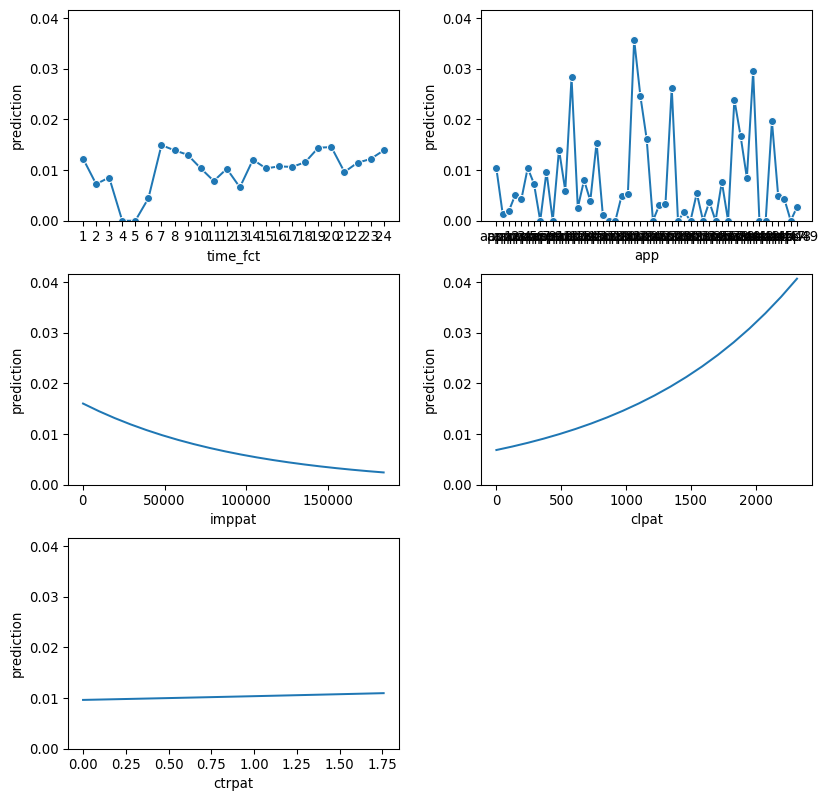

In [20]:
clf_mc3.plot(
    plots="pred", incl=["time_fct", "app", "imppat", "clpat", "ctrpat"]
)

#### Interpretation
Introducing variables like time_fct and app into a logistic regression model with imppat, clpat, and ctrpat can alter prediction plots by changing the relationships between predictors and the outcome. These new variables may interact with existing ones, influencing both the direction and magnitude of effects. Additionally, they can act as confounder adjustments, revealing the true impact of imppat, clpat, and ctrpat on click likelihood by accounting for hidden biases. Conditioning effects may also emerge, as the behavior of existing predictors shifts in the presence of time_fct and app, leading to different probability estimates. Ultimately, these changes are reflected in prediction plots, which visually capture the refined relationships between predictors and the outcome, offering a clearer interpretation of the model's dynamics.

### Decile Analysis

In [21]:
tz_test =tz_gaming[tz_gaming["training"] == "test"]
tz_test["pred_logit_dec"] = (tz_test.groupby("training").pred_logit.transform(rsm.xtile, 10, rev=True))
print(tz_test.head())

      training     inum click  time time_fct    app mobile_os  impup  clup  \
87535     test  I300002    no    21       21   app1   android   1458     3   
87536     test  I300006    no     3        3  app40       ios      3     0   
87537     test  I300012    no     5        5  app12   android   5057     6   
87538     test  I300015    no    10       10   app1   android   1993    10   
87539     test  I300016    no    14       14   app1       ios    212     7   

          ctrup  ...     ctrut  imppat  clpat    ctrpat       rnd  pred_vneta  \
87535  0.205761  ...  0.000000   68113    957  1.405018  0.147891    0.003961   
87536  0.000000  ...  0.000000      50      0  0.000000  0.383246    0.018965   
87537  0.118647  ...  0.000000     754      8  1.061008  1.274485    0.003961   
87538  0.501756  ...  0.000000   26537    276  1.040057  0.673022    0.003961   
87539  3.301887  ...  5.263158   57348    874  1.524029 -0.785851    0.050679   

             id    pred_logit  pred_rnd  pre

/tmp/ipykernel_58081/1756994838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tz_test["pred_logit_dec"] = (tz_test.groupby("training").pred_logit.transform(rsm.xtile, 10, rev=True))


In [22]:
dec_tab = (
    tz_test.groupby('pred_logit_dec')
    .agg(
        nr_impressions= ("pred_logit_dec", "size"),
        nr_clicks= ("click", lambda x: (x == "yes").sum()),
    )
    .assign( ctr= lambda x: x.nr_clicks / x.nr_impressions)
    .reset_index()
)
dec_tab

,pred_logit_dec,nr_impressions,nr_clicks,ctr
0,1,2796,103,0.036838
1,2,2793,48,0.017186
2,3,2788,42,0.015065
3,4,2796,30,0.010730
4,5,2802,15,0.005353
5,6,2796,7,0.002504
6,7,2794,7,0.002505
7,8,2796,3,0.001073
8,9,2796,4,0.001431
9,10,2796,12,0.004292


#### Bar Chart

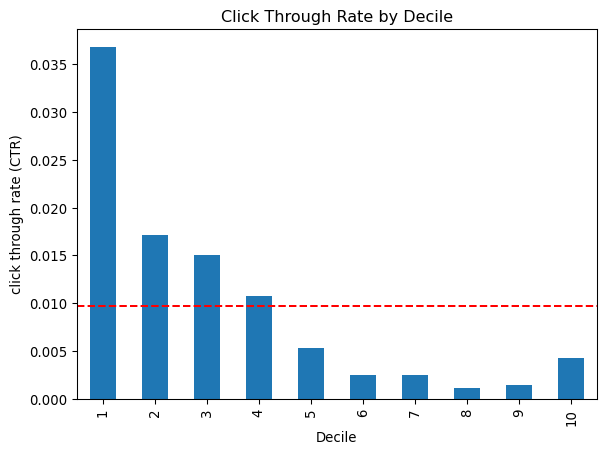

      training     inum click  time time_fct    app mobile_os  impup  clup  \
0        train       I7    no     9        9   app8       ios    439     2   
1        train      I23    no    15       15   app1       ios     64     0   
2        train      I28    no    12       12   app5       ios     80     0   
3        train      I30    no    19       19   app1       ios     25     0   
4        train      I35    no    24       24   app1   android   3834    29   
...        ...      ...   ...   ...      ...    ...       ...    ...   ...   
87530    train  I299985    no    11       11   app2   android   1181     0   
87531    train  I299986    no    10       10  app33       ios   1885     0   
87532    train  I299990    no     1        1  app45       ios      8     0   
87533    train  I299991    no     8        8   app1       ios    113     2   
87534    train  I299995    no    18       18  app35   android     13     0   

          ctrup  ...  clut     ctrut  imppat  clpat    ctrpat  

In [23]:
import matplotlib.pyplot as plt
bc= dec_tab.plot.bar(x="pred_logit_dec", y="ctr", legend=False)

bc.set_xlabel('Decile')
bc.set_ylabel ("click through rate (CTR)")
bc.set_title ("Click Through Rate by Decile")
bc.axhline(dec_tab["ctr"].mean(), color='r', linestyle='--')

plt.show()
print(tz_train)

### Gain Curves

In [24]:
dec_tab["cum_prop"]= dec_tab["nr_impressions"].cumsum()/dec_tab["nr_impressions"].sum()
dec_tab["cum_gains"]= dec_tab['nr_clicks'].cumsum()/dec_tab['nr_clicks'].sum()
gains_tab = dec_tab
gains_tab

,pred_logit_dec,nr_impressions,nr_clicks,ctr,cum_prop,cum_gains
0,1,2796,103,0.036838,0.100025,0.380074
1,2,2793,48,0.017186,0.199943,0.557196
2,3,2788,42,0.015065,0.299682,0.712177
3,4,2796,30,0.010730,0.399707,0.822878
4,5,2802,15,0.005353,0.499946,0.878229
5,6,2796,7,0.002504,0.599971,0.904059
6,7,2794,7,0.002505,0.699925,0.929889
7,8,2796,3,0.001073,0.799950,0.940959
8,9,2796,4,0.001431,0.899975,0.955720
9,10,2796,12,0.004292,1.000000,1.000000


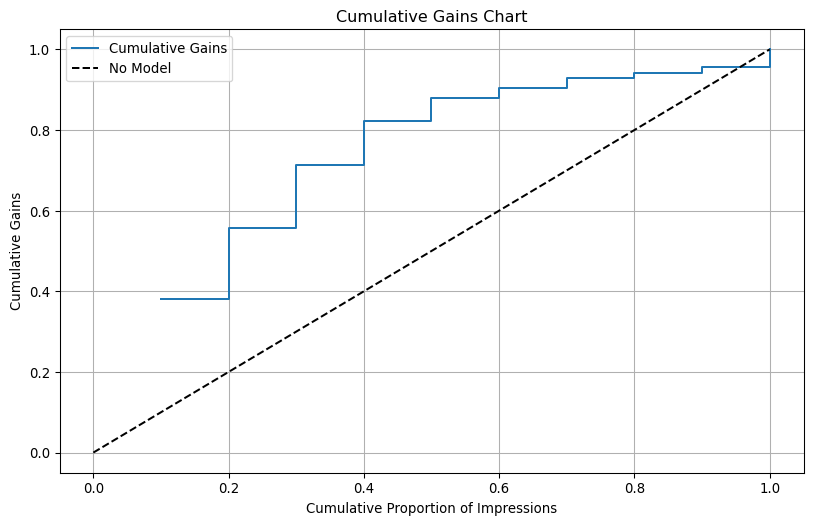

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(dec_tab['cum_prop'], dec_tab['cum_gains'], label='Cumulative Gains', drawstyle='steps-post')
plt.plot([0, 1], [0, 1], 'k--', label='No Model')  

# Labeling the plot
plt.title('Cumulative Gains Chart')
plt.xlabel('Cumulative Proportion of Impressions')
plt.ylabel('Cumulative Gains')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Confusion Matrix

In [26]:
cpm = 10 # cost per 1000 video impression
conversion_rate= 0.05   # conversion to sign up with TZ after clicking on an ad
clv= 25 # expected clv of customers that sign up with TZ after clicking on an ad

threshold= (cpm/(conversion_rate * clv *1000))
threshold

0.008

In [27]:
tz_test = tz_gaming[tz_gaming["training"] == "test"].copy()

tz_test["click_yes"]= tz_test["click"].apply(lambda x: 1 if x == "yes" else 0 if x == "no" else np.nan)

tz_test["click_yes"] = tz_test["click_yes"].astype(float)


tz_test

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd,click_yes
87535,test,I300002,no,21,21,app1,android,1458,3,0.205761,...,0.000000,68113,957,1.405018,0.147891,0.003961,id466983,1.020981e-02,0.008791,0.0
87536,test,I300006,no,3,3,app40,ios,3,0,0.000000,...,0.000000,50,0,0.000000,0.383246,0.018965,id946375,8.665095e-03,0.008718,0.0
87537,test,I300012,no,5,5,app12,android,5057,6,0.118647,...,0.000000,754,8,1.061008,1.274485,0.003961,id479295,1.910723e-14,0.008448,0.0
87538,test,I300015,no,10,10,app1,android,1993,10,0.501756,...,0.000000,26537,276,1.040057,0.673022,0.003961,id83284,6.240407e-03,0.008630,0.0
87539,test,I300016,no,14,14,app1,ios,212,7,3.301887,...,5.263158,57348,874,1.524029,-0.785851,0.050679,id359434,1.233449e-02,0.009086,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,test,I399982,no,21,21,app2,ios,2110,0,0.000000,...,0.000000,23216,19,0.081840,-1.852059,0.003961,id847352,1.093091e-03,0.009435,0.0
115484,test,I399986,no,17,17,app14,android,291,1,0.343643,...,1.351351,3665,14,0.381992,-0.296415,0.003961,id457437,3.609483e-03,0.008930,0.0
115485,test,I399991,no,23,23,app1,android,364,3,0.824176,...,0.000000,173353,2292,1.322158,0.099201,0.003961,id792352,2.052670e-02,0.008806,0.0
115486,test,I399992,no,20,20,app6,android,59,2,3.389831,...,2.702703,3474,53,1.525619,-0.186421,0.050679,id115678,2.192207e-02,0.008896,0.0


In [28]:
TP = ((tz_test["training"] == "test") & (tz_test["pred_logit"]> threshold) & (tz_test["click_yes"] == 1)).sum()
FP = ((tz_test["training"] == "test") & (tz_test["pred_logit"]> threshold) & (tz_test["click_yes"] == 0)).sum()
TN = ((tz_test["training"] == "test") & (tz_test["pred_logit"]<= threshold) & (tz_test["click_yes"] == 0)).sum()
FN = ((tz_test["training"] == "test") & (tz_test["pred_logit"]<= threshold) & (tz_test["click_yes"] == 1)).sum()

cm_logit = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr" : [TP, FP, TN, FN]# TP, FP, TN, and FN values in that order
    }
)
cm_logit

,label,nr
0,TP,221
1,FP,10661
2,TN,17021
3,FN,50


#### Accuracy

In [29]:
accuracy_logit = (TP + TN) / (TP + TN + FP + FN)# float
accuracy_logit

np.float64(0.6168210925482059)

#### Confusion Matrix Based on Pred_RND

In [30]:
TP = ((tz_test["training"] == "test") & (tz_test["pred_rnd"]> threshold) & (tz_test["click_yes"] == 1)).sum()
FP = ((tz_test["training"] == "test") & (tz_test["pred_rnd"]> threshold) & (tz_test["click_yes"] == 0)).sum()
TN = ((tz_test["training"] == "test") & (tz_test["pred_rnd"]<= threshold) & (tz_test["click_yes"] == 0)).sum()
FN = ((tz_test["training"] == "test") & (tz_test["pred_rnd"]<= threshold) & (tz_test["click_yes"] == 1)).sum()


cm_rnd = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP, FP, TN, FN]# TP, FP, TN, and FN values in that order
    }
)
cm_rnd

,label,nr
0,TP,271
1,FP,27606
2,TN,76
3,FN,0


### Accuracy Based on Pred_RND Confusion Matrix

In [31]:
accuracy_rnd = (TP + TN) / (TP + TN + FP + FN)# float
accuracy_rnd

np.float64(0.012413694415626229)

#### Summary and Interpretation

In [32]:
first_model = {
    "TP": 271,
    "FP": 27606,
    "TN": 76,
    "FN": 0
}

rnd_model = {
    "TP": 0,
    "FP": 0,
    "TN": 27682,
    "FN": 271
}

def compute_metrics(cm):
    TP = cm["TP"]
    FP = cm["FP"]
    TN = cm["TN"]
    FN = cm["FN"]
    total = TP + FP + TN + FN

    accuracy = (TP + TN) / total
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {
        "TP": TP,
        "FP": FP,
        "TN": TN,
        "FN": FN,
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "Specificity": round(specificity, 4),
        "F1 Score": round(f1_score, 4)
    }

first_metrics = compute_metrics(first_model)
rnd_metrics = compute_metrics(rnd_model)

results_df = pd.DataFrame({
    "Metric": list(first_metrics.keys()),
    "First Model": list(first_metrics.values()),
    "RND": list(rnd_metrics.values())
})

print(results_df.to_string(index=False))

     Metric  First Model        RND
         TP     271.0000     0.0000
         FP   27606.0000     0.0000
         TN      76.0000 27682.0000
         FN       0.0000   271.0000
   Accuracy       0.0124     0.9903
  Precision       0.0097     0.0000
     Recall       1.0000     0.0000
Specificity       0.0027     1.0000
   F1 Score       0.0193     0.0000


The First Model correctly identified all 271 true positives, achieving 100% recall but only 0.97% precision due to 27,606 false positives. In contrast, the RND model predicted no positives, resulting in perfect specificity and 99.02% accuracy, but 0% recall and no ability to detect actual clicks. Although the First Model's accuracy was just 1.03%, it was more useful than the RND model because it captured all true click events. However, its extremely low precision highlights inefficiency, as most predicted clicks were incorrect. This comparison shows that in imbalanced datasets, metrics like precision, recall, and F1 score are more informative than accuracy alone


### Model Comparison

#### Cost Information
* Cost per 1,000 video impressions (CPM) is $10
* Conversion to sign-up as a TZ game player after clicking on an ad is 5%
* The expected CLV of customers that sign-up with TZ after clicking on an ad is approximately $25
* The total cost of the data from Vneta is $50K
* The total cost charged for the data science consulting services by Vneta is $150K

In [33]:
cpm = 10 # cost per 1000 video impression
conversion_rate= 0.05   # conversion to sign up with TZ after clicking on an ad
clv= 25 # expected clv of customers that sign up with TZ after clicking on an ad
total_impressions = 20_000_000 # given in the problem above
additional_cost_VNETA = 50_000 # cost of the data from VNETA DATA
additional_cost_Consulting= 150_000 #cost of thr consulting services by VNETA
additional_cost_spamming= 0 #cost for spamming with no VNETA involve

def calculate_break_even_response_rate(cpm,conversion_rate, clv, total_impressions,additional_cost):
    total_cost = (total_impressions/1000) *cpm +additional_cost
    margin = total_impressions * conversion_rate * clv
    break_even_rate_of_response= total_cost/margin
    return break_even_rate_of_response

break_even_response_rate_spamming= calculate_break_even_response_rate(cpm,conversion_rate, clv, total_impressions, additional_cost_spamming)
break_even_response_rate_spamming

0.008

In [34]:
tz_gaming= tz_test
tz_gaming["target_logit"] = tz_gaming["pred_logit"] > break_even_response_rate_spamming
tz_gaming["target_rnd"] = tz_gaming["pred_rnd"]> break_even_response_rate_spamming
tz_gaming["target_vneta"]= tz_gaming["pred_vneta"] >break_even_response_rate_spamming
tz_gaming

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd,click_yes,target_logit,target_rnd,target_vneta
87535,test,I300002,no,21,21,app1,android,1458,3,0.205761,...,1.405018,0.147891,0.003961,id466983,1.020981e-02,0.008791,0.0,True,True,False
87536,test,I300006,no,3,3,app40,ios,3,0,0.000000,...,0.000000,0.383246,0.018965,id946375,8.665095e-03,0.008718,0.0,True,True,True
87537,test,I300012,no,5,5,app12,android,5057,6,0.118647,...,1.061008,1.274485,0.003961,id479295,1.910723e-14,0.008448,0.0,False,True,False
87538,test,I300015,no,10,10,app1,android,1993,10,0.501756,...,1.040057,0.673022,0.003961,id83284,6.240407e-03,0.008630,0.0,False,True,False
87539,test,I300016,no,14,14,app1,ios,212,7,3.301887,...,1.524029,-0.785851,0.050679,id359434,1.233449e-02,0.009086,0.0,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,test,I399982,no,21,21,app2,ios,2110,0,0.000000,...,0.081840,-1.852059,0.003961,id847352,1.093091e-03,0.009435,0.0,False,True,False
115484,test,I399986,no,17,17,app14,android,291,1,0.343643,...,0.381992,-0.296415,0.003961,id457437,3.609483e-03,0.008930,0.0,False,True,False
115485,test,I399991,no,23,23,app1,android,364,3,0.824176,...,1.322158,0.099201,0.003961,id792352,2.052670e-02,0.008806,0.0,True,True,False
115486,test,I399992,no,20,20,app6,android,59,2,3.389831,...,1.525619,-0.186421,0.050679,id115678,2.192207e-02,0.008896,0.0,True,True,True


#### Spamming

In [35]:
total_succesful_clicks= tz_gaming[(tz_gaming["click_yes"]== 1)].shape[0]
total_succesful_clicks
total_costs = (tz_gaming.shape[0]/1000)*cpm
total_costs
total_revenue= total_succesful_clicks*conversion_rate*clv
total_revenue
profit_spam =total_revenue- total_costs
profit_spam
rome_spam= (profit_spam/total_costs)
rome_spam
print(profit_spam, rome_spam)

59.22000000000003 0.21185561478195555


#### LOGIT

In [36]:
total_succesful_clicks = tz_gaming[(tz_gaming["target_logit"] == True) & (tz_gaming["click_yes"]== 1)].shape[0]
total_succesful_clicks
total_costs = (tz_gaming[(tz_gaming["target_logit"]== True)].shape[0]/1000)*cpm
total_costs
total_revenue= total_succesful_clicks*conversion_rate*clv
total_revenue
profit_logit =total_revenue- total_costs
profit_logit
rome_logit= (profit_logit/total_costs)
rome_logit
print(profit_logit, rome_logit)

167.43 1.5385958463517737


#### RND

In [37]:
total_succesful_clicks = tz_gaming[(tz_gaming["target_rnd"] == True) & (tz_gaming["click_yes"]== 1)].shape[0]
total_succesful_clicks
total_costs = (tz_gaming[(tz_gaming["target_rnd"]== True)].shape[0]/1000)*cpm
total_costs
total_revenue= total_succesful_clicks*conversion_rate*clv
total_revenue
profit_rnd =total_revenue- total_costs
profit_rnd
rome_rnd= (profit_rnd/total_costs)
rome_rnd
print(profit_rnd, rome_rnd)

59.98000000000002 0.21515945044301762


#### VNETA

In [38]:
total_succesful_clicks = tz_gaming[(tz_gaming["target_vneta"] == True) & (tz_gaming["click_yes"]== 1)].shape[0]
total_succesful_clicks
total_costs = (tz_gaming[(tz_gaming["target_vneta"]== True)].shape[0]/1000)*cpm
total_costs
total_revenue= total_succesful_clicks*conversion_rate*clv
total_revenue
profit_vneta =total_revenue- total_costs
profit_vneta
rome_vneta= (profit_vneta/total_costs)
rome_vneta
print(profit_vneta, rome_vneta)

151.29 3.1059330732909047


#### Summary


In [39]:
tz_gaming["pred_spam"] = 1
tz_gaming["target_spam"] = True

mod_perf = pd.DataFrame(
    {
        "model": [
            "logit",
            "rnd",
            "vneta",
            "spam",
        ],
        "profit": [profit_logit, profit_rnd, profit_vneta, profit_spam],
        "ROME": [rome_logit, rome_rnd, rome_vneta, rome_spam],
    }
)
mod_perf

,model,profit,ROME
0,logit,167.43,1.538596
1,rnd,59.98,0.215159
2,vneta,151.29,3.105933
3,spam,59.22,0.211856


#### Analysis
The Vneta model demonstrates the highest ROME at 3.105933, making it the most efficient in marketing budget utilization. It generates a profit of 151.29, slightly lower than the Logit model but still highly effective. This model is ideal for scenarios where marketing efficiency and budget allocation are top priorities. On the other hand, the Logit model achieves the highest profit of 167.43, though its ROME is lower than that of the Vneta model, indicating reduced spending efficiency. It is best suited for cases where maximizing total profit is more important than efficiency. In contrast, both the Rnd and Spam models underperform in terms of profit and ROME compared to predictive models, suggesting that predictive strategies significantly outperform non-targeted methods. Overall, the Vneta model is recommended for its superior marketing efficiency, while the Logit model is preferred for maximizing profit. The choice between these two depends on whether ROI or total profit is the primary objective.

### Profit Comparison

In [40]:
total_impressions_purchased = 20_000_000
test_sample= tz_gaming.shape[0]
test_sample
logit = (profit_logit /test_sample)* total_impressions_purchased
rnd= (profit_rnd/test_sample) * total_impressions_purchased
vneta= (profit_vneta/test_sample) * total_impressions_purchased
spam= (profit_spam/test_sample) * total_impressions_purchased

logit, rnd, vneta, spam

(119793.93982756771, 42914.89285586521, 108245.98433084105, 42371.12295639111)

### ROME Comparison

In [41]:
total_costs = (tz_gaming[(tz_gaming["target_logit"]== True)].shape[0]/1000)*cpm
rome_logit = logit/total_costs

total_costs = (tz_gaming[(tz_gaming["target_rnd"]== True)].shape[0]/1000)*cpm
rome_rnd= logit/total_costs

total_costs = (tz_gaming[(tz_gaming["target_vneta"]== True)].shape[0]/1000)*cpm
rome_vneta = vneta/total_costs

total_costs = (tz_gaming.shape[0]/1000)*cpm
rome_spam = spam/total_costs 

rome_logit, rome_rnd, rome_vneta, rome_logit

(1100.8448798710506, 429.7232120657449, 2222.2538355746465, 1100.8448798710506)

#### Profit and ROME Summary

In [42]:
mod_perf_20M = pd.DataFrame(
    {
        "model": [
            "logit",
            "rnd",
            "vneta",
            "spam",
        ],
        "profit": [logit, rnd, vneta, spam],
        "ROME": [rome_logit, rome_rnd, rome_vneta, rome_spam],
    }
)
mod_perf_20M

,model,profit,ROME
0,logit,119793.939828,1100.844880
1,rnd,42914.892856,429.723212
2,vneta,108245.984331,2222.253836
3,spam,42371.122956,151.579877


## Conclusion
The Logit model leads in profit generation with $119,793.94, making it the top choice for revenue maximization, though its ROME stands at 1100.84, which, while strong, is not the highest. The Rnd model lags behind with a profit of $42,914.89 and a ROME of 429.73, reflecting lower efficiency and profitability. Similarly, the Spam model records $42,371.12 in profit, closely matching the Rnd model, but has the lowest ROME at 151.579877, making it the least effective approach. The Vneta model, on the other hand, secures a high profit of $108,245.98 and boasts the highest ROME at 2222.253, demonstrating superior marketing efficiency. This makes Vneta the optimal choice for balancing profit and marketing spend efficiency. Given its outstanding ROME, the Vneta model is the primary recommendation for maximizing investment returns. However, the Logit model remains a solid alternative for cases where absolute profit takes precedence over efficiency. The new data aligns with previous recommendations, reaffirming Vneta’s leadership in efficiency despite slightly lower profits than the Logit model. The results confirm that predictive models significantly outperform non-targeted approaches like the Rnd and Spam models. Ultimately, the Vneta model is best for those prioritizing a balance of high profit and peak efficiency, while the Logit model is the go-to option for pure profit maximization.  